This notebook will look up indices for subsetting the HYCOM netcdf files

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt 
import datetime
import numpy as np

from salishsea_tools.nowcast import figures, residuals
from salishsea_tools import viz_tools
%matplotlib inline

# Global Grid for SSH

Define subdomain

(48, 49)

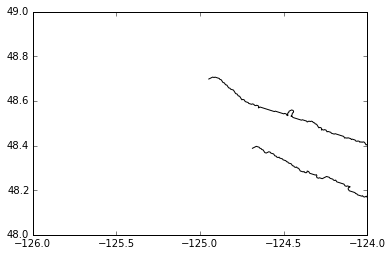

In [2]:
grid = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
lon_min = -126
lon_max = - 124
lat_min = 48
lat_max = 49

fig,ax = plt.subplots(1,1)
viz_tools.plot_coastline(ax,grid,coords = 'map')
ax.set_xlim([lon_min, lon_max])
ax.set_ylim([lat_min, lat_max])

In [3]:
date = datetime.date.today() - datetime.timedelta(days=1)
datestr = date.strftime('%Y%m%d')
url = ('http://nomads.ncep.noaa.gov:9090/dods/rtofs/rtofs_global{}/rtofs_glo_2ds_forecast_3hrly_diag'.format(datestr))

f = nc.Dataset(url)

lon = f.variables['lon'][:] - 360
lat = f.variables['lat'][:]

#isolate region
jss = np.where(np.logical_and(lat>=lat_min, lat <= lat_max))
iss = np.where(np.logical_and(lon>=lon_min, lon <= lon_max))
print jss

ssh_sub = f.variables['ssh'][:,:,jss[0], iss[0]]
lat_sub = lat[jss]
lon_sub = lon[iss]

(array([1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667,
       1668]),)


Plot

<matplotlib.colorbar.Colorbar instance at 0x7f94a1f79fc8>

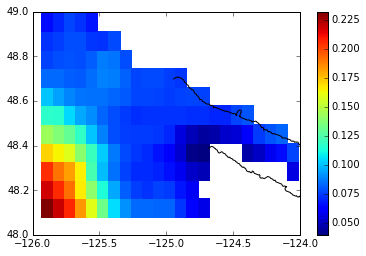

In [4]:

fig,ax = plt.subplots(1,1)
plt.pcolormesh(lon_sub, lat_sub, ssh_sub[1,0,:,:])
viz_tools.plot_coastline(ax,grid,coords = 'map')
ax.set_xlim([lon_min, lon_max])
ax.set_ylim([lat_min, lat_max])
plt.colorbar()

# T+S

In [5]:
date = datetime.date.today() - datetime.timedelta(days=1)
datestr = date.strftime('%Y%m%d')
url = ('http://nomads.ncep.noaa.gov:9090/dods/rtofs/rtofs_global{}/rtofs_glo_3dz_nowcast_6hrly_reg2'.format(datestr))

f = nc.Dataset(url)

lon = f.variables['lon'][:]
lat = f.variables['lat'][:]

#isolate region
jss = np.where(np.logical_and(lat>=lat_min, lat <= lat_max))
iss = np.where(np.logical_and(lon>=lon_min, lon <= lon_max))
print jss

sal_sub = f.variables['salinity'][:,:,jss[0], iss[0]]
lat_sub = lat[jss]
lon_sub = lon[iss]

(array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026]),)


<matplotlib.colorbar.Colorbar instance at 0x7f94a1b1f9e0>

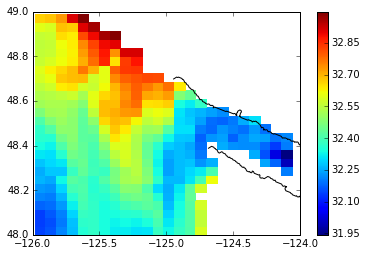

In [6]:

fig,ax = plt.subplots(1,1)
plt.pcolormesh(lon_sub, lat_sub, sal_sub[1,0,:,:])
viz_tools.plot_coastline(ax,grid,coords = 'map')
ax.set_xlim([lon_min, lon_max])
ax.set_ylim([lat_min, lat_max])
plt.colorbar()